Steps involved for the time series forecasting
1. Introduction and Installation
2. Data Preprocessing
3. Model fitting
4. Obtaining the forecast
5. Plotting the forecast
6. Cross validation
7. Computing the performance metrics
8. Visualize the performance metrics
9. Conclusions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fbprophet
%matplotlib inline
import warnings

In [63]:
warnings.filterwarnings("ignore")

In [64]:
df= pd.read_csv(r"milk.csv")
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [65]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


In [66]:
df.dtypes

Month                                                       object
Monthly milk production: pounds per cow. Jan 62 ? Dec 75     int64
dtype: object

In [67]:
d= df.copy()

In [68]:
d.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [69]:
d.set_index("Month", inplace=True)

<AxesSubplot:xlabel='Month'>

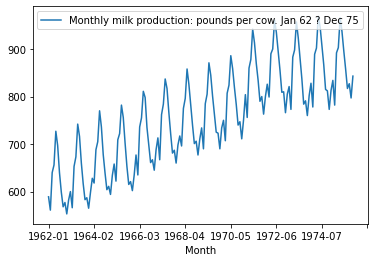

In [70]:
d.plot()

In [71]:
#above we can see seasonal trend in the data

In [72]:
#always change the month column with the name ds and target column with the name y when using fbprophet

In [73]:
df.columns= ["ds","y"]

In [74]:
df.head()

,ds,y
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [75]:
df["ds"]= pd.to_datetime(df.ds)

In [76]:
df.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [77]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

stationarity of data

<AxesSubplot:>

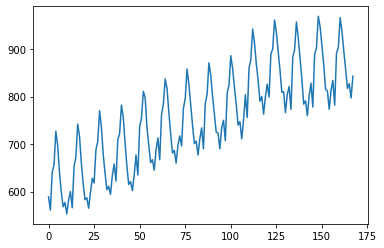

In [78]:
df.y.plot()

In [79]:
from fbprophet import Prophet

In [80]:
df.head()

,ds,y
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [81]:
model= Prophet()

In [82]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
model

In [84]:
model.growth, model.holidays, model.seasonalities

('linear',
 None,
 OrderedDict([('yearly',
               {'period': 365.25,
                'fourier_order': 10,
                'prior_scale': 10.0,
                'mode': 'additive',
                'condition_name': None})]))

In [85]:
# creating future dates for prediction into a dataframe
future= model.make_future_dataframe(periods=365)

In [86]:
df.tail()

,ds,y
163,1975-08-01,858
164,1975-09-01,817
165,1975-10-01,827
166,1975-11-01,797
167,1975-12-01,843


In [87]:
future.tail()

,ds
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29
532,1976-11-30


In [88]:
pred=model.predict(future)

In [89]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.849794,576.773188,596.555643,606.849794,606.849794,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,0.0,0.0,0.0,586.745106
1,1962-02-01,608.569237,535.771025,556.004242,608.569237,608.569237,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,0.0,0.0,0.0,546.026015
2,1962-03-01,610.122282,632.068986,651.297963,610.122282,610.122282,31.413370,31.413370,31.413370,31.413370,31.413370,31.413370,0.0,0.0,0.0,641.535653
3,1962-04-01,611.841725,647.823512,668.481735,611.841725,611.841725,46.743537,46.743537,46.743537,46.743537,46.743537,46.743537,0.0,0.0,0.0,658.585263
4,1962-05-01,613.505703,711.690249,731.924377,613.505703,613.505703,108.056343,108.056343,108.056343,108.056343,108.056343,108.056343,0.0,0.0,0.0,721.562045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,1976-11-26,875.143414,803.768403,827.379249,870.953939,880.212869,-59.972681,-59.972681,-59.972681,-59.972681,-59.972681,-59.972681,0.0,0.0,0.0,815.170733
529,1976-11-27,875.161832,808.288977,829.330297,870.942349,880.252186,-56.771512,-56.771512,-56.771512,-56.771512,-56.771512,-56.771512,0.0,0.0,0.0,818.390320
530,1976-11-28,875.180250,810.989030,833.682995,870.932886,880.291503,-53.400510,-53.400510,-53.400510,-53.400510,-53.400510,-53.400510,0.0,0.0,0.0,821.779740
531,1976-11-29,875.198668,813.241637,836.554049,870.935430,880.330820,-49.922769,-49.922769,-49.922769,-49.922769,-49.922769,-49.922769,0.0,0.0,0.0,825.275899


In [90]:
pred[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.745106,576.773188,596.555643
1,1962-02-01,546.026015,535.771025,556.004242
2,1962-03-01,641.535653,632.068986,651.297963
3,1962-04-01,658.585263,647.823512,668.481735
4,1962-05-01,721.562045,711.690249,731.924377


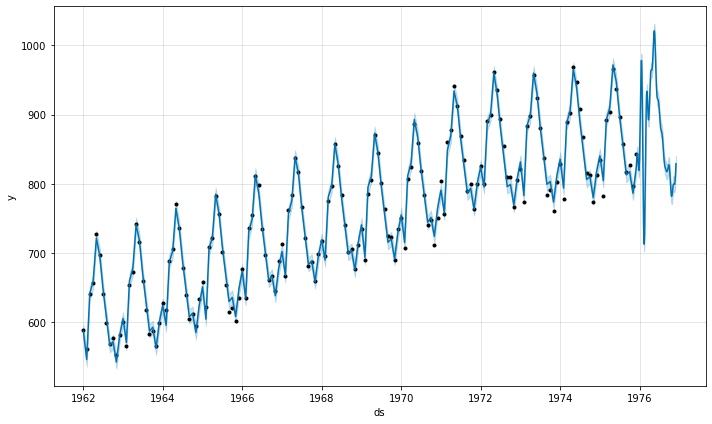

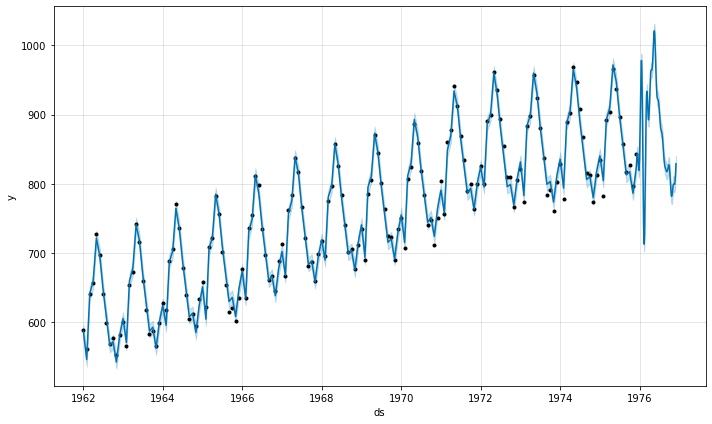

In [91]:
#forecasting
model.plot(pred)

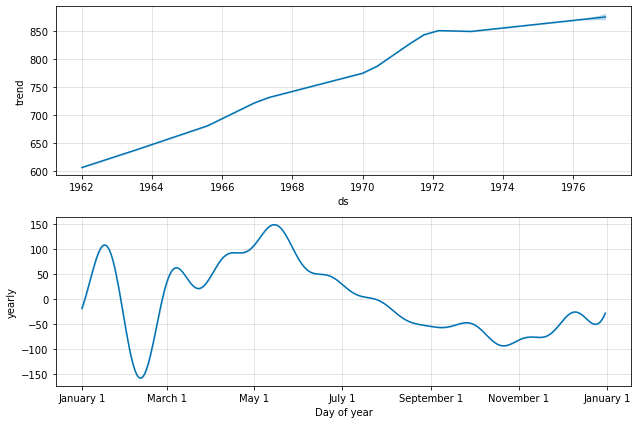

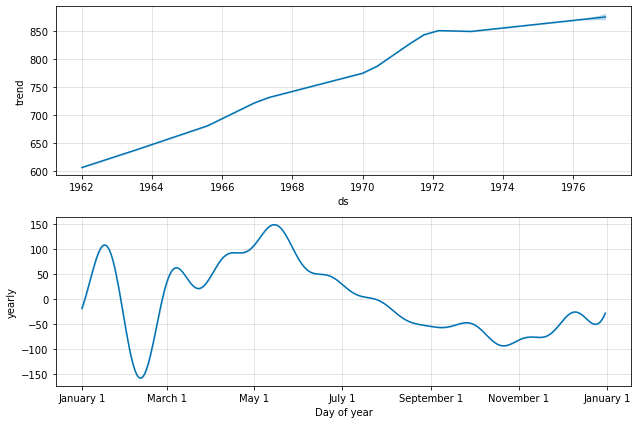

In [92]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(pred)

In [93]:
from fbprophet.diagnostics import cross_validation

In [94]:
print("days=",365+180)

days= 545


This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.

The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

In [95]:
df_cv= cross_validation(model, horizon="365 days", period= "180 days", initial= "1095 days")

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [96]:
df_cv.size

1512

In [97]:
df_cv.shape

(252, 6)

In [98]:
365-180

185

In [99]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,619.087141,617.180839,620.808115,622,1965-01-22
1,1965-03-01,697.071986,690.476948,702.877583,709,1965-01-22
2,1965-04-01,709.290761,695.398442,721.213713,722,1965-01-22
3,1965-05-01,774.436723,752.580478,795.291258,782,1965-01-22
4,1965-06-01,742.879282,711.528888,773.506527,756,1965-01-22


In [100]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
247,1975-08-01,850.582813,840.743287,860.808673,858,1974-12-01
248,1975-09-01,808.189317,798.314462,818.484895,817,1974-12-01
249,1975-10-01,811.611644,801.930270,821.730368,827,1974-12-01
250,1975-11-01,779.609808,768.581599,790.684333,797,1974-12-01
251,1975-12-01,814.158114,802.668838,825.454671,843,1974-12-01


In [101]:
from fbprophet.diagnostics import performance_metrics

In [102]:
df_per= performance_metrics(df_cv)

In [103]:
df_per.shape

(185, 7)

In [104]:
df_per.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.28
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.28
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.28
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.28
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.28


In [105]:
df_per.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
180,357 days,881.141224,29.684023,22.511721,0.028321,0.021820,0.40
181,360 days,687.891427,26.227684,19.452020,0.024156,0.017203,0.44
182,361 days,675.174515,25.984120,19.054909,0.023753,0.014183,0.44
183,362 days,658.322393,25.657794,18.347110,0.022942,0.013880,0.48
184,365 days,689.693127,26.262009,19.319182,0.024046,0.014183,0.44


In [106]:
df_per

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.28
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.28
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.28
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.28
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.28
...,...,...,...,...,...,...,...
180,357 days,881.141224,29.684023,22.511721,0.028321,0.021820,0.40
181,360 days,687.891427,26.227684,19.452020,0.024156,0.017203,0.44
182,361 days,675.174515,25.984120,19.054909,0.023753,0.014183,0.44
183,362 days,658.322393,25.657794,18.347110,0.022942,0.013880,0.48


In [107]:
from fbprophet.plot import plot_cross_validation_metric

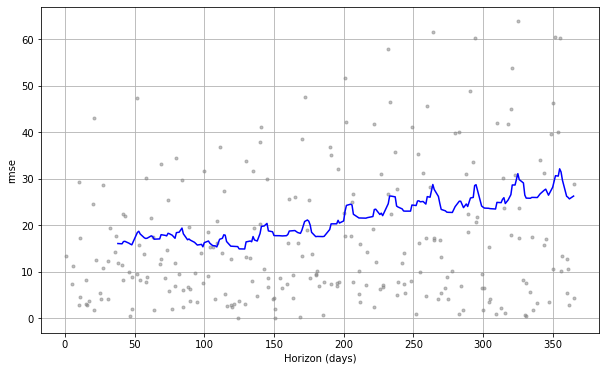

In [108]:
fig=plot_cross_validation_metric(df_cv, metric="rmse")